In [2]:
# Full library list and version numbers

print('This notebook was prepared using:')

import sys
print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

import seaborn as sns
print('seaborn version %s' % sns.__version__)

import matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
print('matplotlib version %s' % matplotlib.__version__)

import scipy
from scipy import stats
print('scipy version %s' % scipy.__version__)

import pickle
print('pickle version %s' % pickle.format_version)

import importlib

sys.path.append('./src')

import mplot as mp  # See mplot.py in the current directory

import lolipop_helper
import figures as FIG
import PALTEanalysis
import tobramycin_analysis

import MPL as MPL
import analyze_and_plot as AP
import reconstruct_clades as RC
import infer_fitness as IF
import print_info as PI
import LTEE
import LTEE_helper as LH
import simulation_helper as SH
import estimate_covariance as EC

# GitHub directories
DATA_DIR = './data'
SIMULATION_DIR = './data/simulation'
CLUSTERIZATION_OUTPUT_DIR = './data/clusterization_output'
RECONSTRUCTION_OUTPUT_DIR = './data/reconstruction_output'
LOLIPOP_JOBS_DIR = './data/lolipop/jobs'
LOLIPOP_INPUT_DIR = './data/lolipop/input'
LOLIPOP_OUTPUT_DIR = './data/lolipop/output'
LOLIPOP_PARSED_OUTPUT_DIR = './data/lolipop/parsed_output'
JOB_DIR = './jobs'
FIG_DIR = './figures'

# METHODS = FIG.METHODS

This notebook was prepared using:
python version 3.6.10 |Anaconda, Inc.| (default, Mar 25 2020, 18:53:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.19.1
seaborn version 0.11.0
matplotlib version 3.3.2
scipy version 1.5.2
pickle version 4.0


In [3]:
def resetPlottingParams():
    PARAMS = {'text.usetex': False, 'mathtext.fontset': 'stixsans', 'mathtext.default': 'regular', 'pdf.fonttype': 42, 'ps.fonttype': 42}
    plt.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams.update(PARAMS)

In [4]:
resetPlottingParams()

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [6]:
def reload():
    importlib.reload(AP)
    importlib.reload(RC)
    importlib.reload(IF)
    importlib.reload(LH)
    importlib.reload(PI)
    importlib.reload(lolipop_helper)
    importlib.reload(FIG)
    importlib.reload(PALTEanalysis)
    importlib.reload(tobramycin_analysis)
    importlib.reload(mp)
    importlib.reload(EC)
reload()

# Trajectories

In [7]:
TRAJ_MARGINPROPS = {
    'left': 0.07,
    'right': 0.98,
    'top': 0.98,
    'bottom': 0.1,
}

def plotTraj(traj, times, save_file=None, title=None, figsize=None):
    if figsize is None:
        h = AP.SINGLE_COLUMN / 2
        w = h * 2
        figsize = (w, h)
    T, L = traj.shape
    AP.plotTraj(traj, times=times, colors=['grey'] * L, alpha=0.6, figsize=figsize, linewidth=AP.SIZELINE,
        fontsize=AP.SIZELABEL, title=title, marginprops=TRAJ_MARGINPROPS,
        save_file=save_file)

Good examples:
- 4, 2 periods, 2nd period is simple (only 1 clade)
- 6, 2 periods, 2nd period has 2 clades. 
- 23, 38, 39, 1st period is boring. 

In [12]:
for n in range(40):
    rec = SH.load_reconstruction_for_a_simulation(params, n)
    numClades = tuple([period.numClades for period in rec.periods])
    if len(rec.periods) == 2 and numClades==(2,2):
        print(f"""n={n}, numPeriods={len(rec.periods)}, numAlleles={rec.L}, numClades={numClades},   
        periodLengths={[boundaries[1] - boundaries[0] for boundaries in rec.periodBoundaries]}
        periodBoundaries={rec.periodBoundaries}, refinedBoundaries={rec.refinedPeriodBoundaries}""")

n=1, numPeriods=2, numAlleles=9, numClades=(2, 2),   
        periodLengths=[893, 109]
        periodBoundaries=[(0, 893), (892, 1001)], refinedBoundaries=[(0, 879), (879, 1001)]
n=6, numPeriods=2, numAlleles=10, numClades=(2, 2),   
        periodLengths=[706, 296]
        periodBoundaries=[(0, 706), (705, 1001)], refinedBoundaries=[(0, 508), (508, 1001)]
n=9, numPeriods=2, numAlleles=10, numClades=(2, 2),   
        periodLengths=[441, 561]
        periodBoundaries=[(0, 441), (440, 1001)], refinedBoundaries=[(0, 311), (311, 1001)]
n=20, numPeriods=2, numAlleles=7, numClades=(2, 2),   
        periodLengths=[561, 441]
        periodBoundaries=[(0, 561), (560, 1001)], refinedBoundaries=[(0, 11), (11, 1001)]
n=24, numPeriods=2, numAlleles=9, numClades=(2, 2),   
        periodLengths=[486, 516]
        periodBoundaries=[(0, 486), (485, 1001)], refinedBoundaries=[(0, 385), (385, 1001)]
n=28, numPeriods=2, numAlleles=8, numClades=(2, 2),   
        periodLengths=[681, 321]
        periodB

In [8]:
%%time
reload()
params = SH.Params()  # Default parameters for simulation
# Load the first simulation, and get reconstruction result
simulation = SH.load_simulation(params, 6)

CPU times: user 40.5 ms, sys: 4.32 ms, total: 44.8 ms
Wall time: 44.4 ms


cladeFixedTimes = [705]
period boundaries:  [(0, 706), (705, 1001)]
ancestors:  [0, 1, 3]
refined period boundaries:  [(0, 508), (508, 1001)]


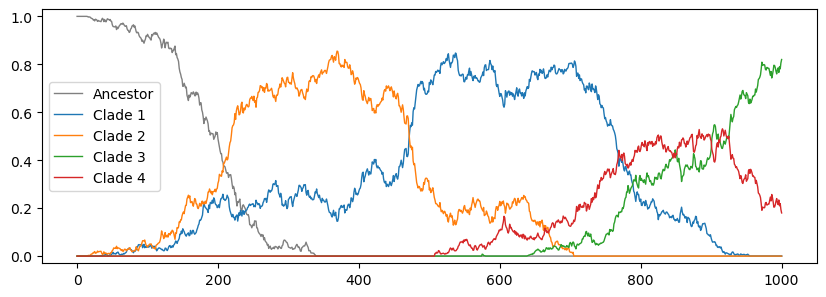

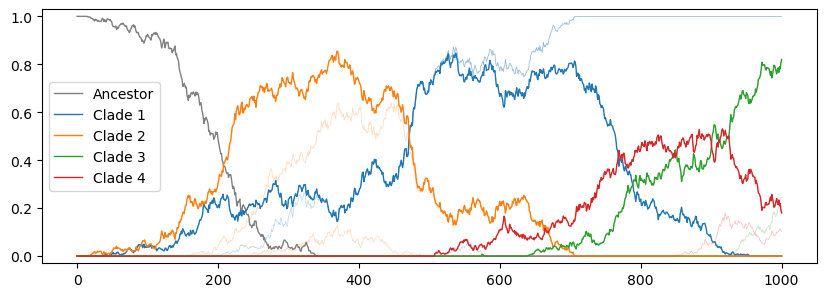

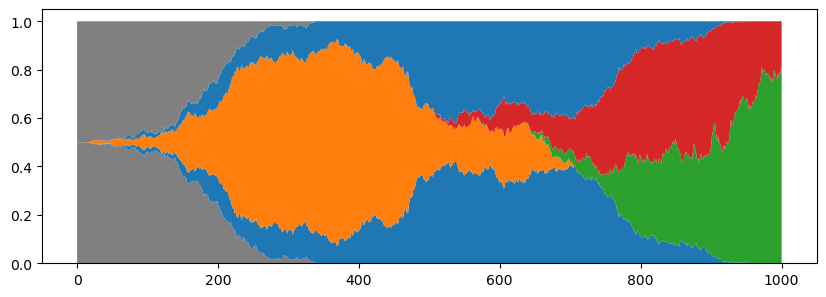

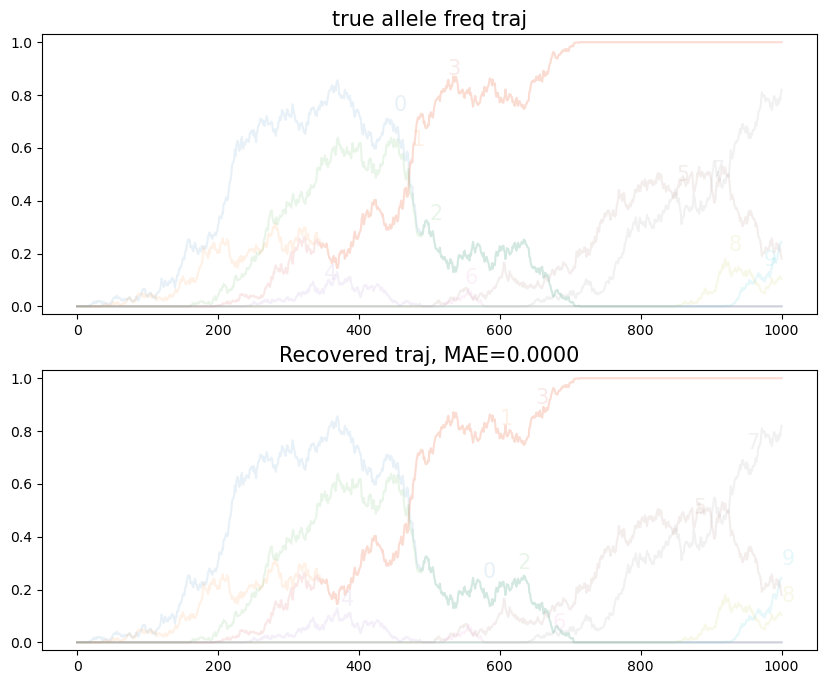

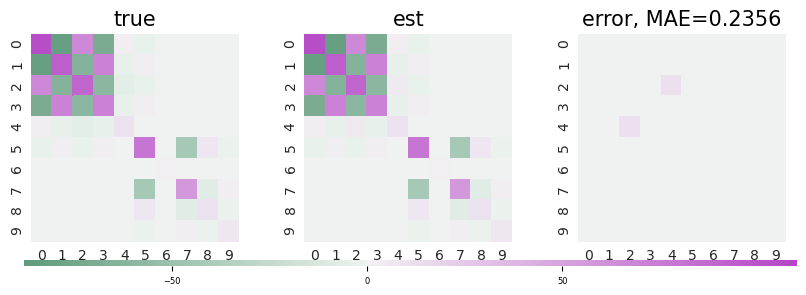

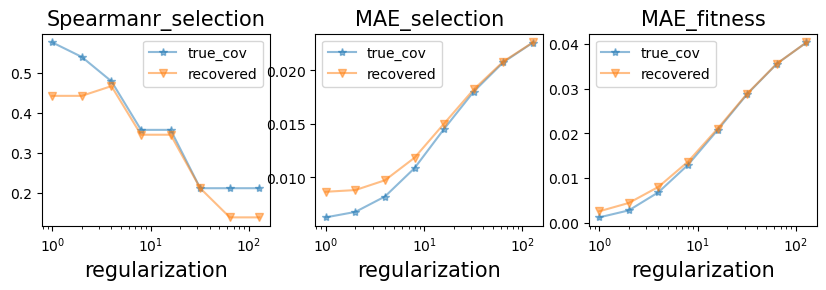

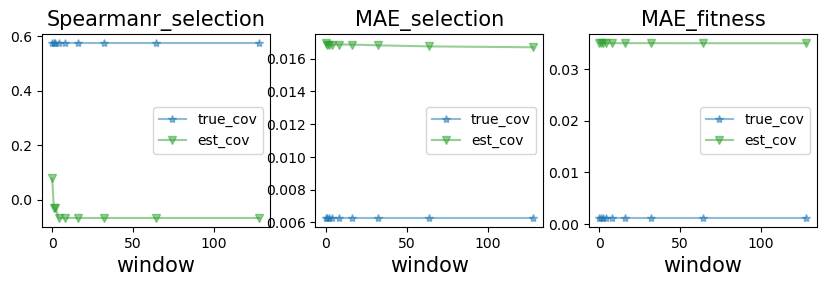

Plotting recovered results using regularization of 1, window of 128


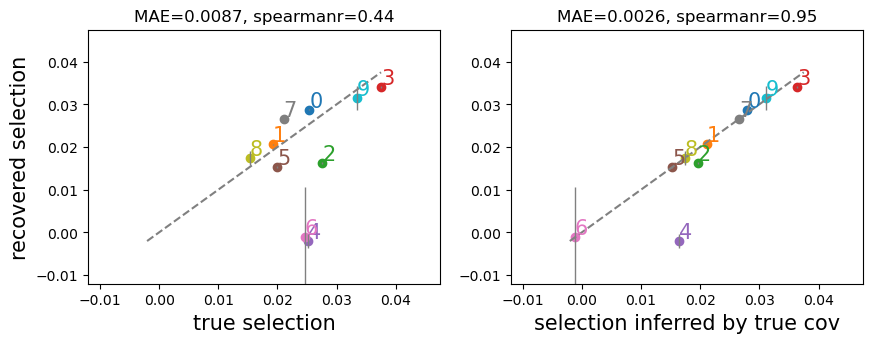

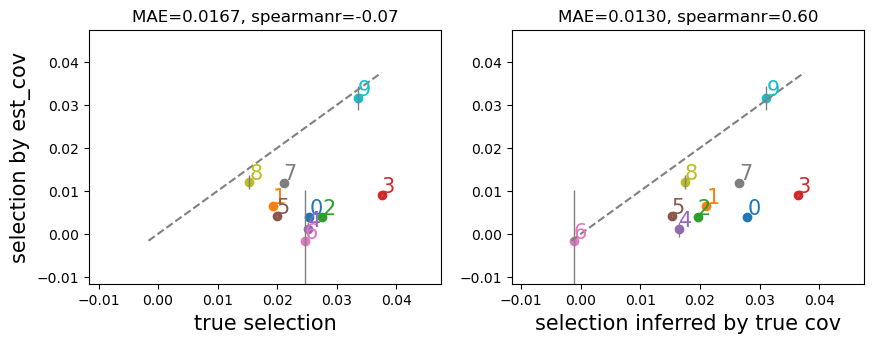

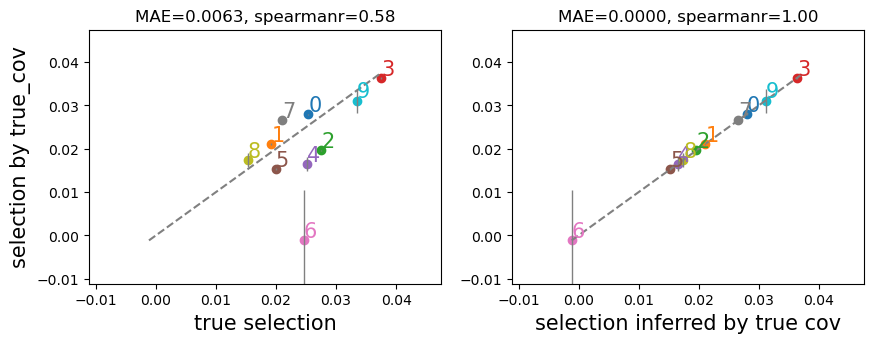

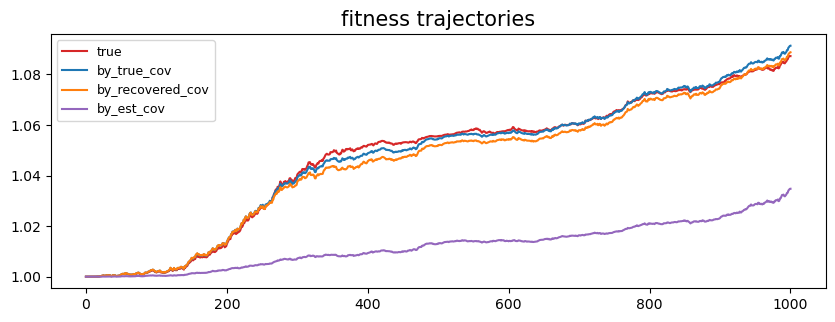

Plotting recovered results using regularization of 1, window of 128


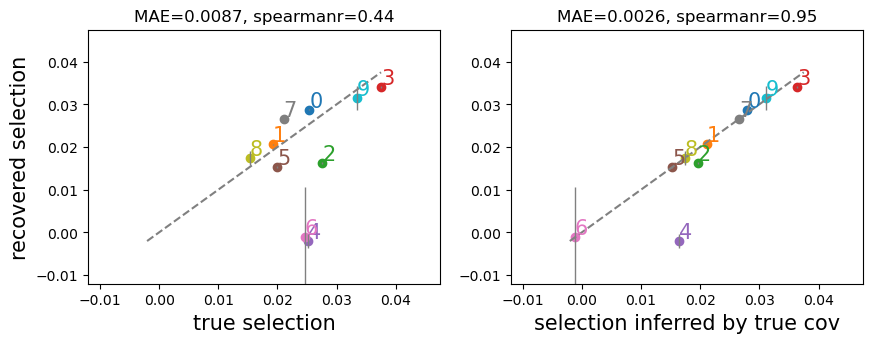

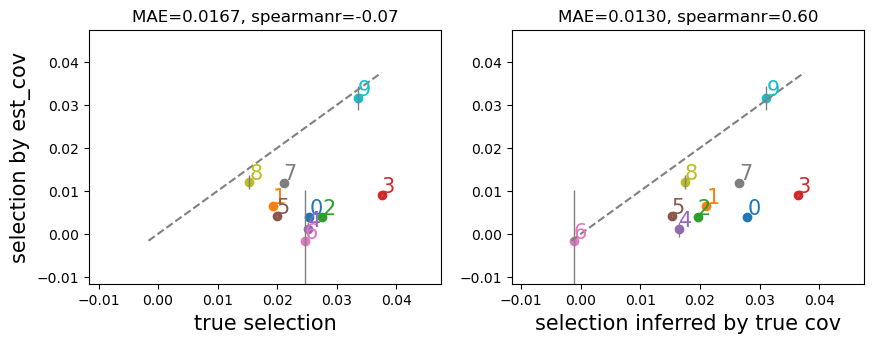

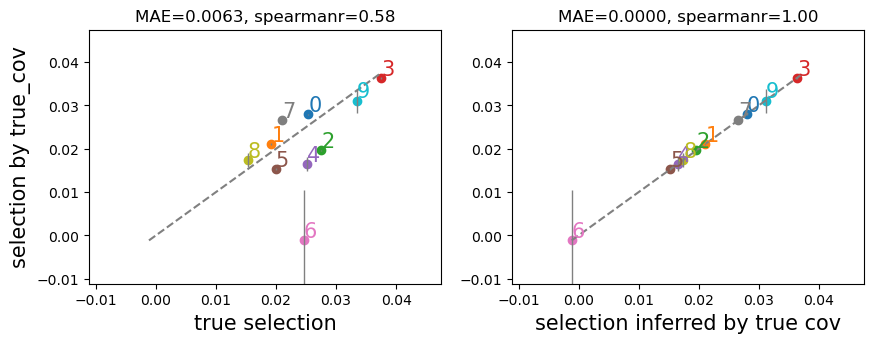

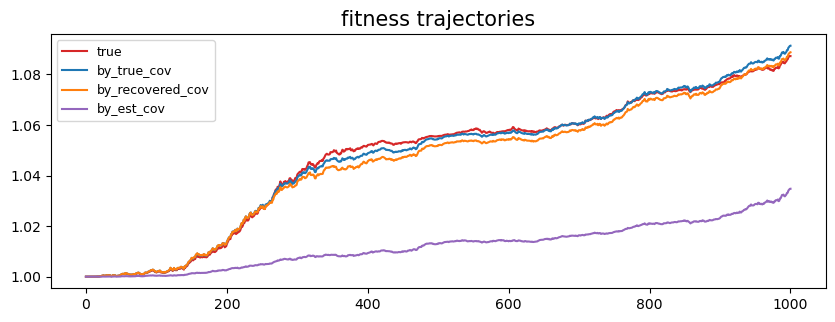

CPU times: user 15.8 s, sys: 1.11 s, total: 16.9 s
Wall time: 17.2 s


In [611]:
%%time
reload()
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation, plot=True)

> Forming groups from dxdx matrix...
  shared    group 1    group 2    group 3
       0          5          3          2
> Forming groups from dxdx matrix...
  shared    group 1    group 2
       0          7          3


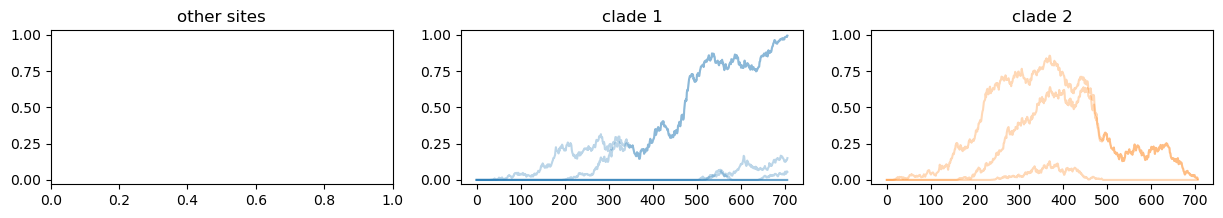

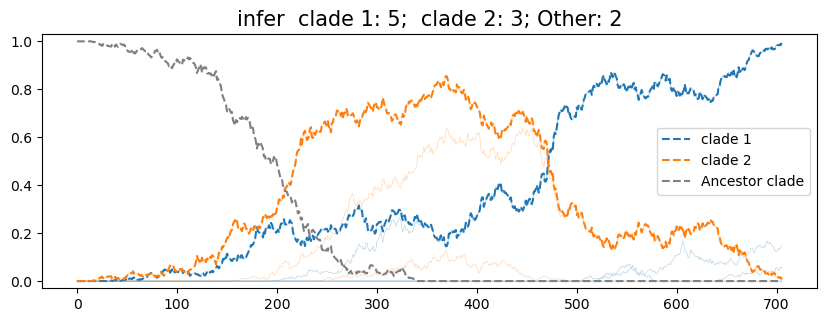

> Forming groups from dxdx matrix...
  shared    group 1    group 2
       0          6          4


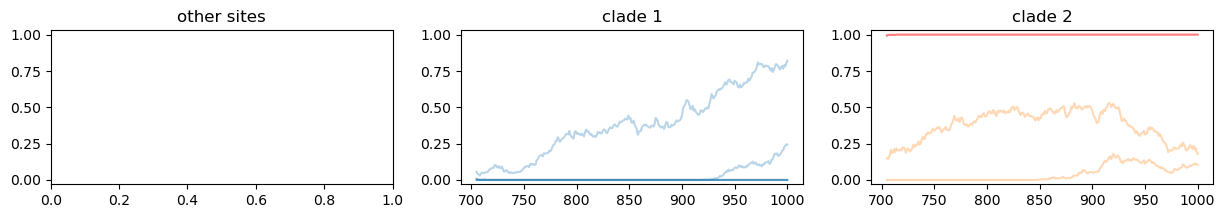

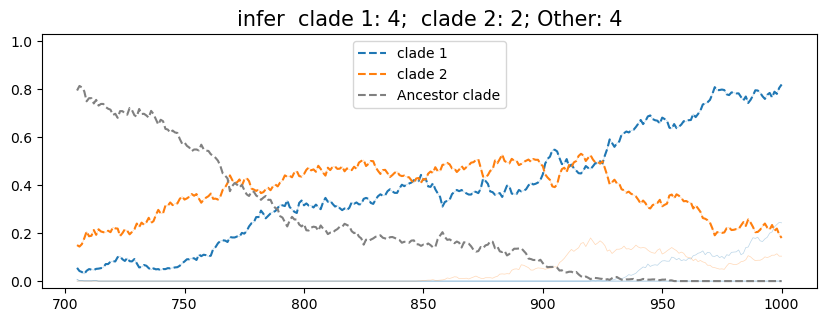

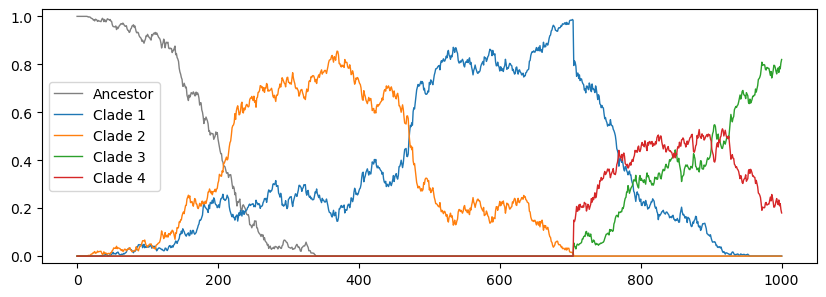

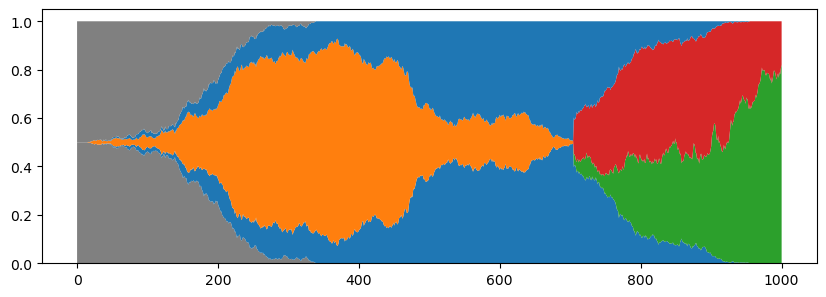

> Forming groups from dxdx matrix...
  shared    group 1    group 2
       0          7          3


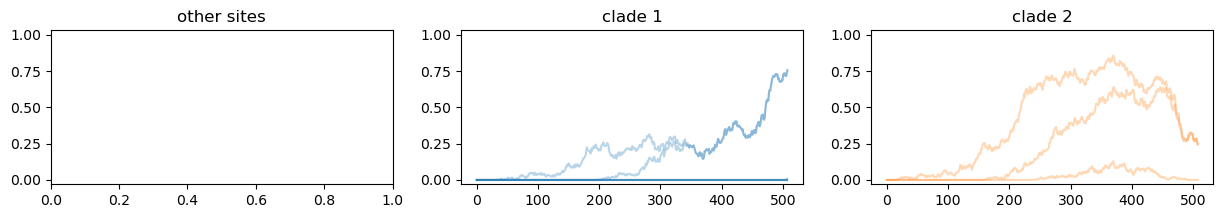

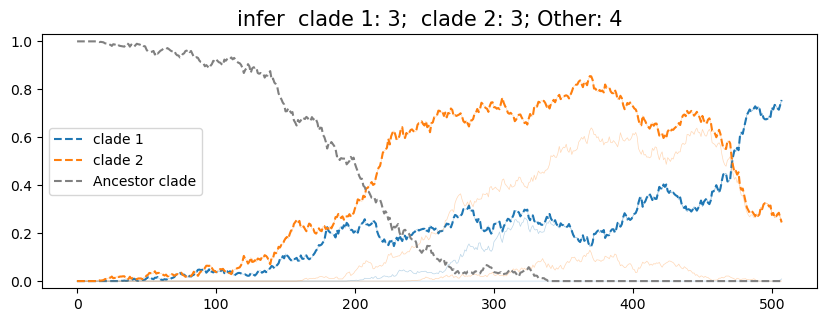

> Forming groups from dxdx matrix...
  shared    group 1    group 2    group 3
       2          3          3          2


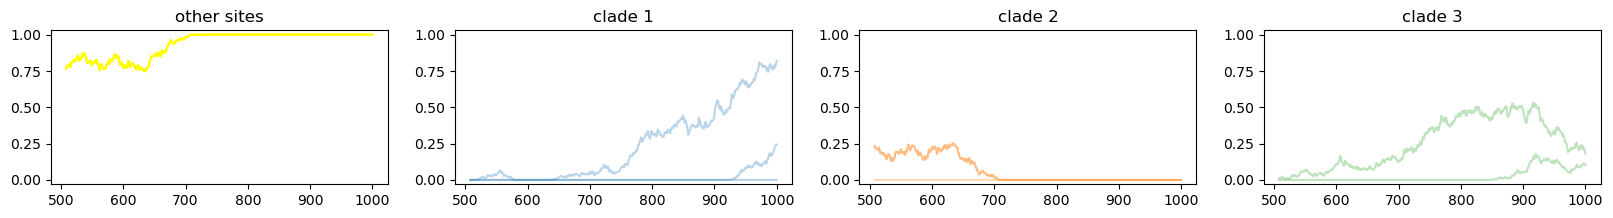

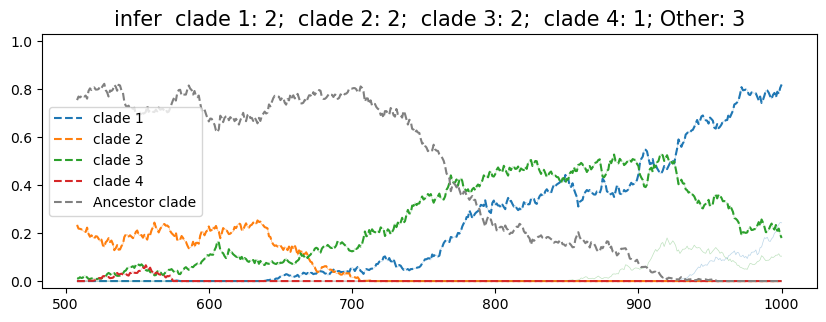

cladeFixedTimes = [705]
period boundaries:  [(0, 706), (705, 1001)]
ancestors:  [0, 1, 3]
refined period boundaries:  [(0, 508), (508, 1001)]


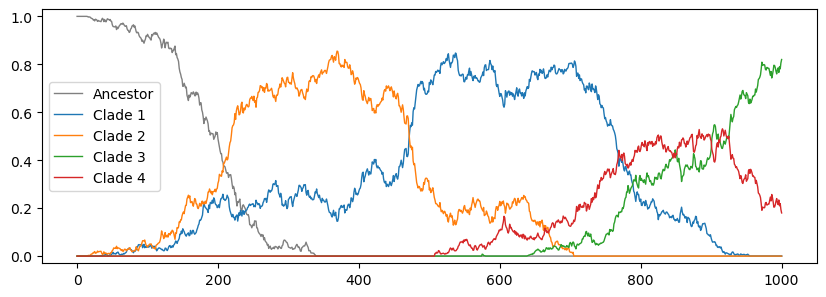

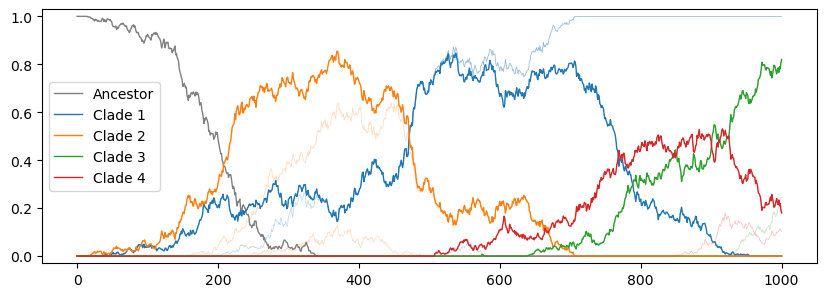

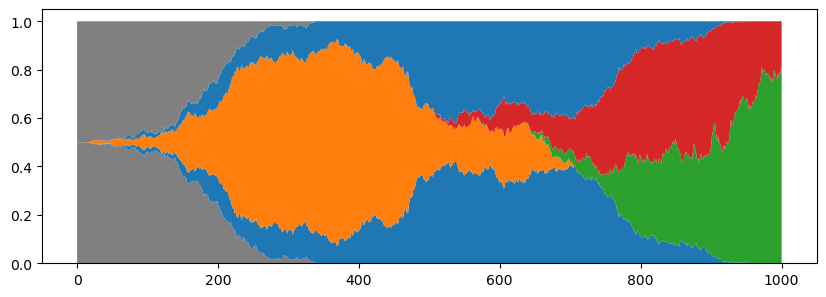

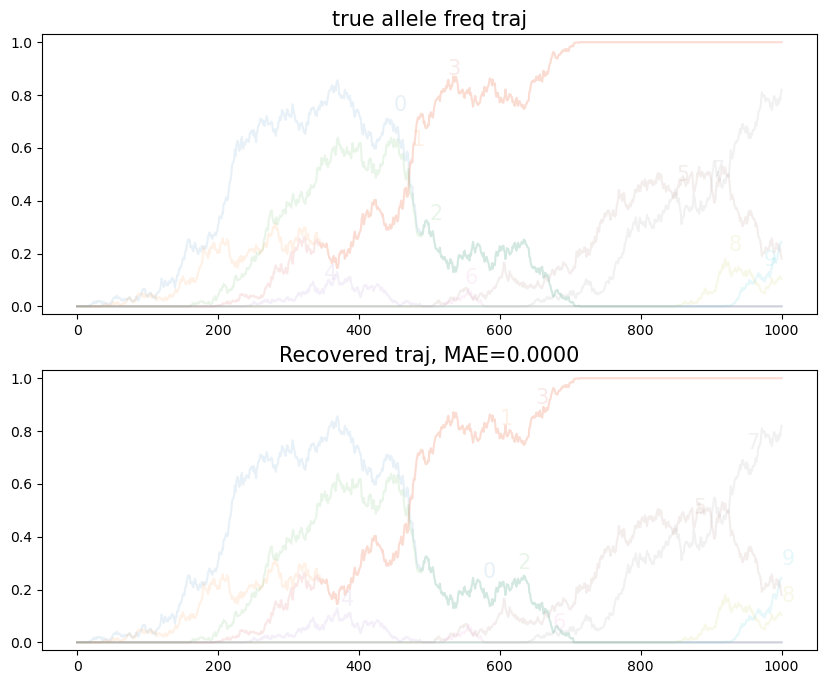

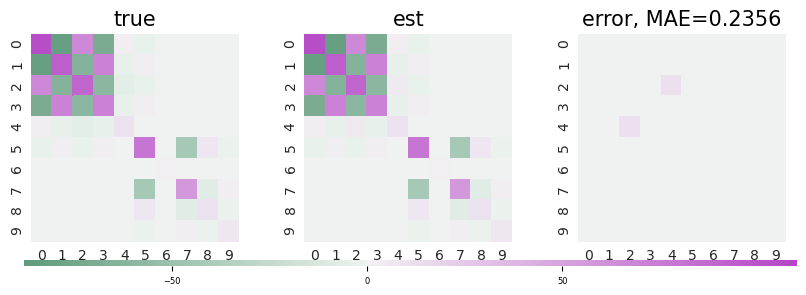

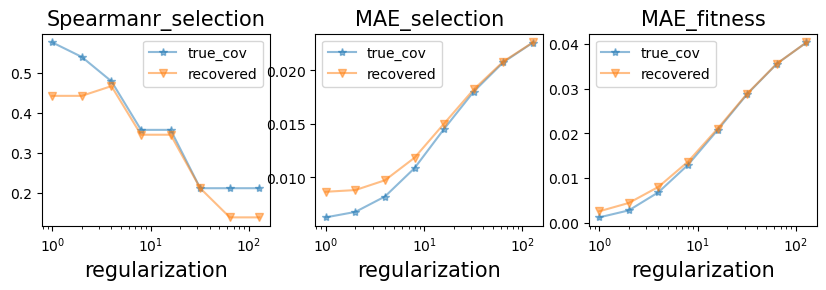

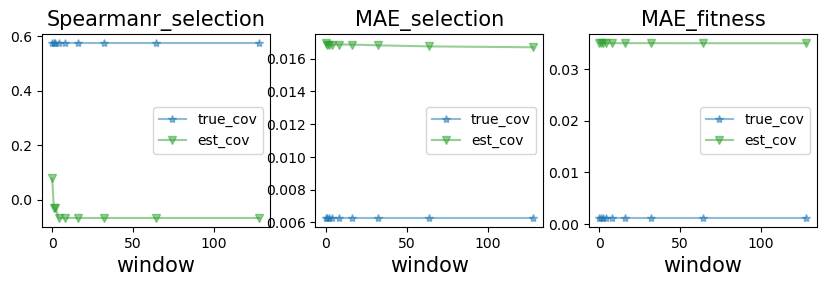

Plotting recovered results using regularization of 1, window of 128


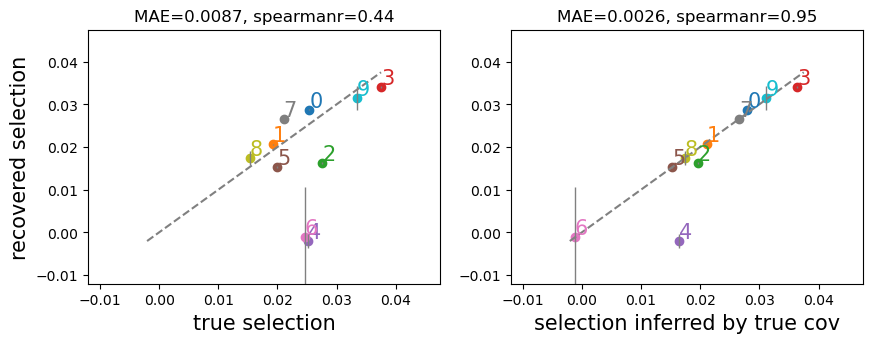

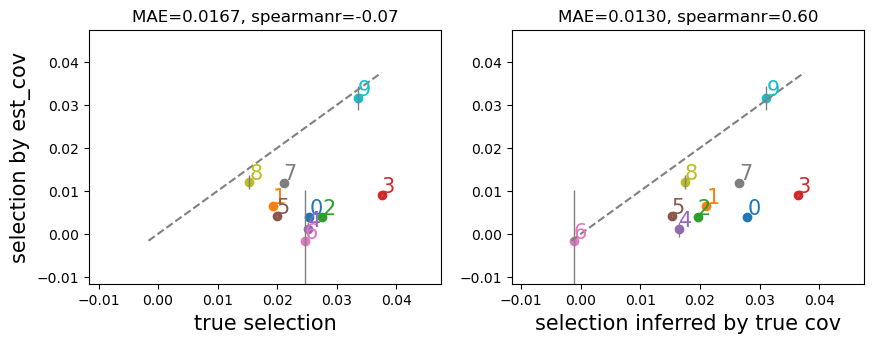

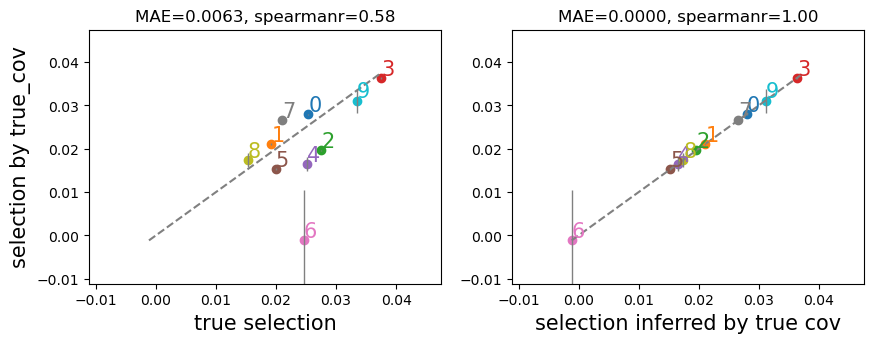

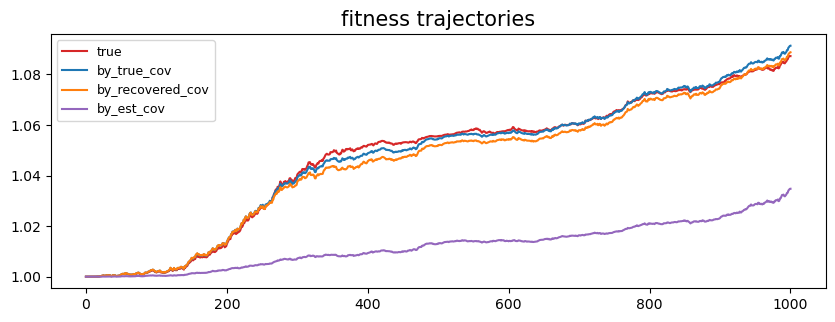

Plotting recovered results using regularization of 1, window of 128


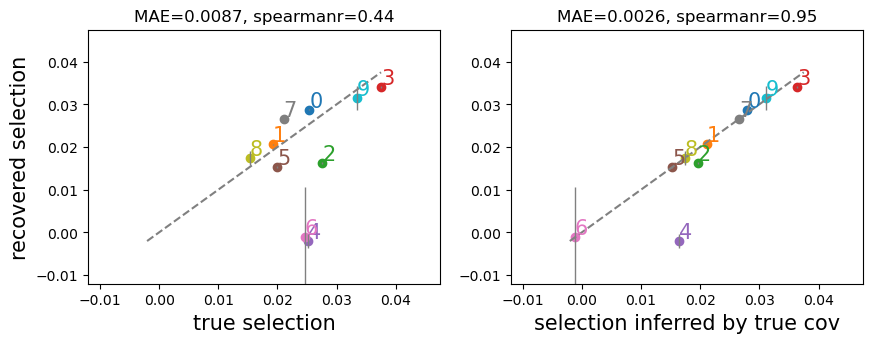

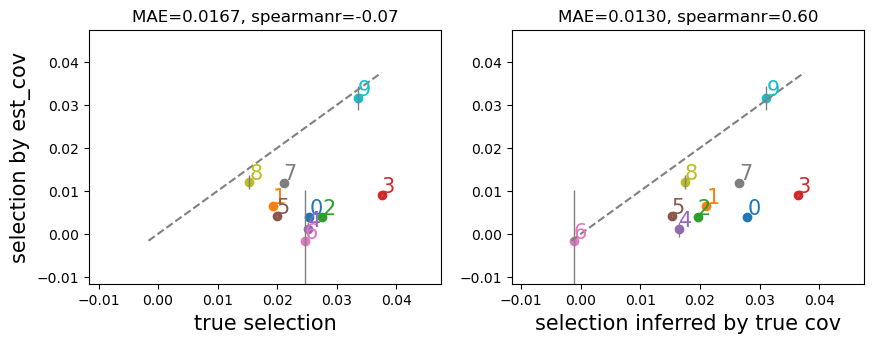

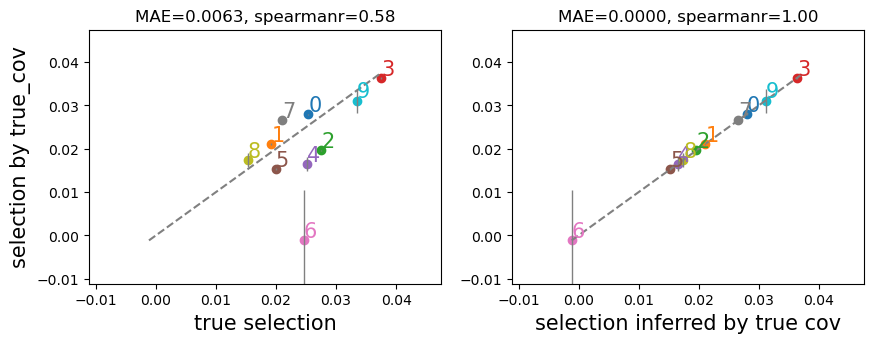

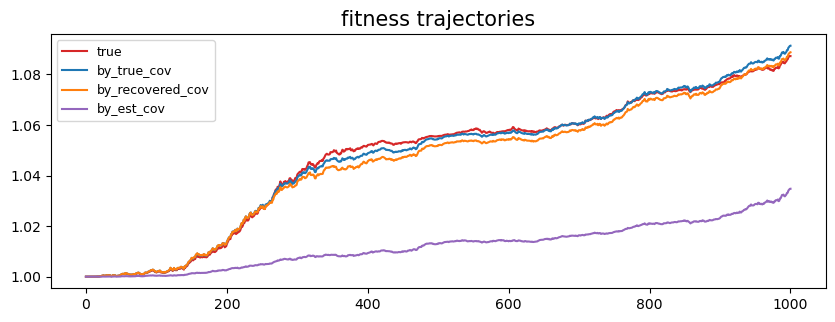

In [9]:
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation, plot=True, verbose=True)

> Forming groups from dxdx matrix...
  shared    group 1    group 2
       0          5          3
> Forming groups from dxdx matrix...
  shared    group 1    group 2
       0          6          2


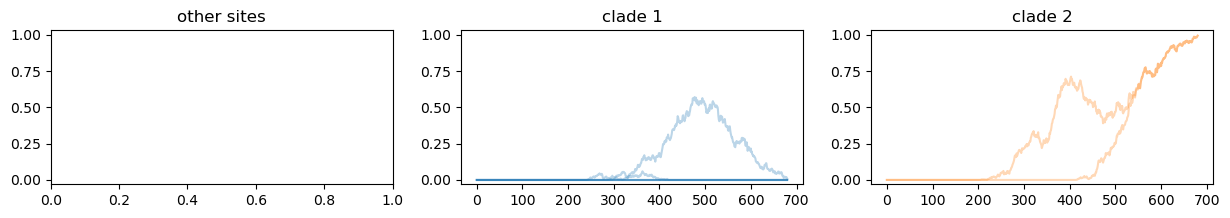

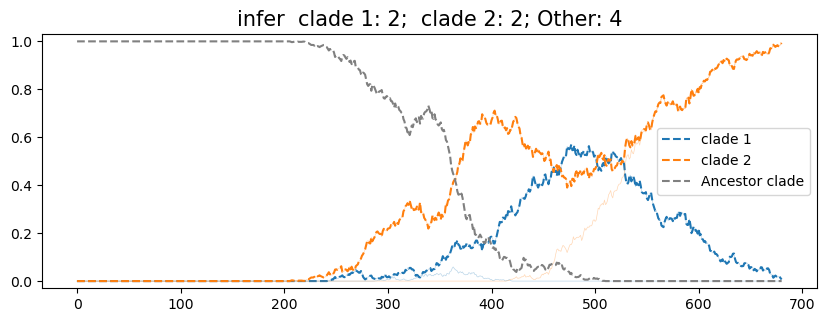

> Forming groups from dxdx matrix...
  shared    group 1    group 2
       0          6          2


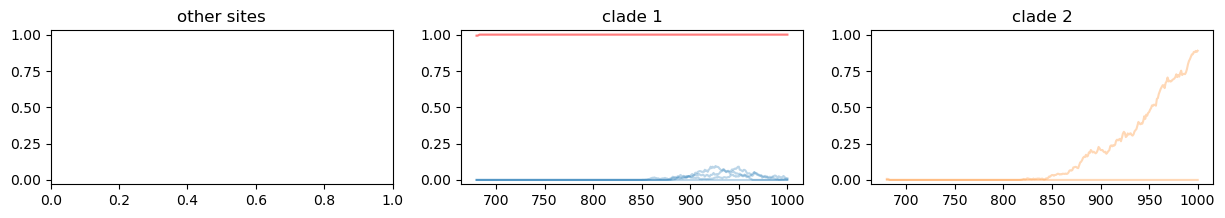

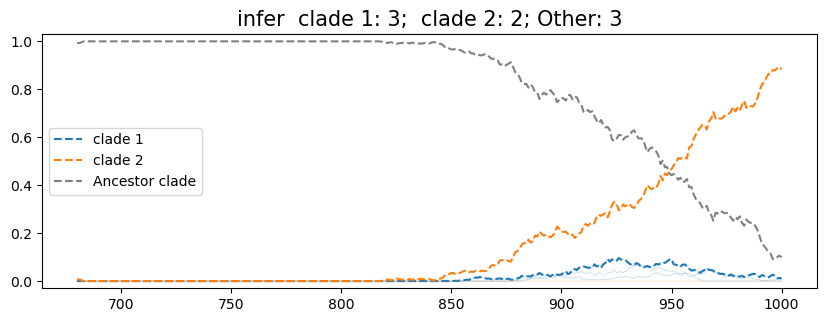

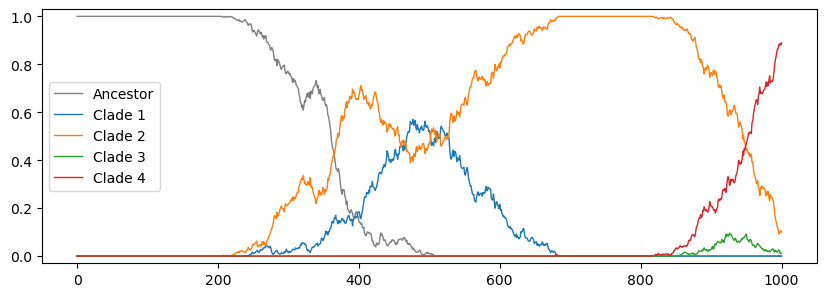

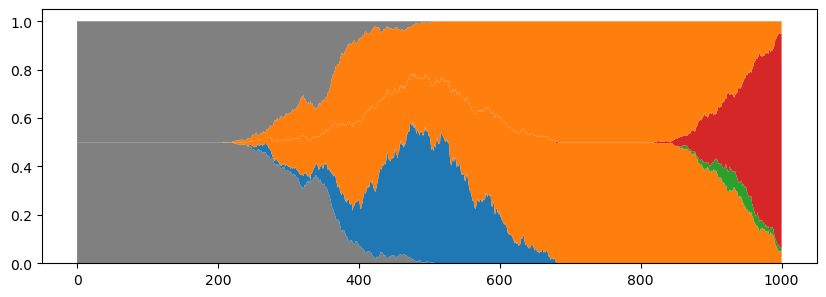

> Forming groups from dxdx matrix...
  shared    group 1    group 2
       0          6          2


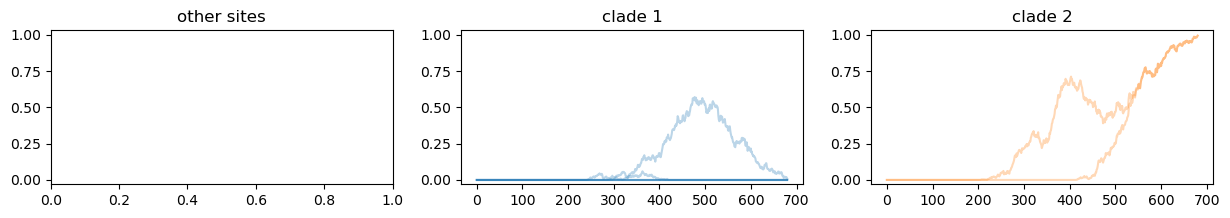

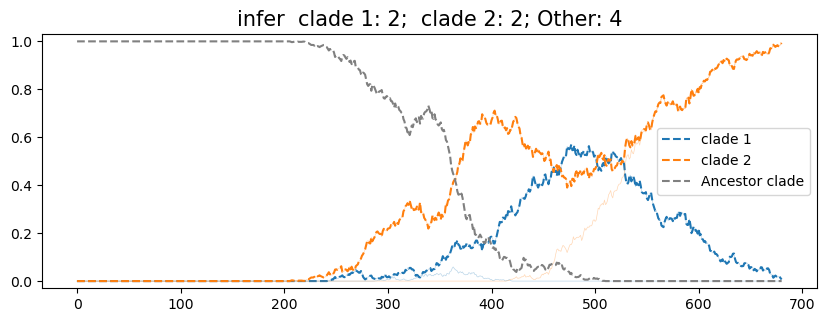

> Forming groups from dxdx matrix...
  shared    group 1    group 2
       0          6          2


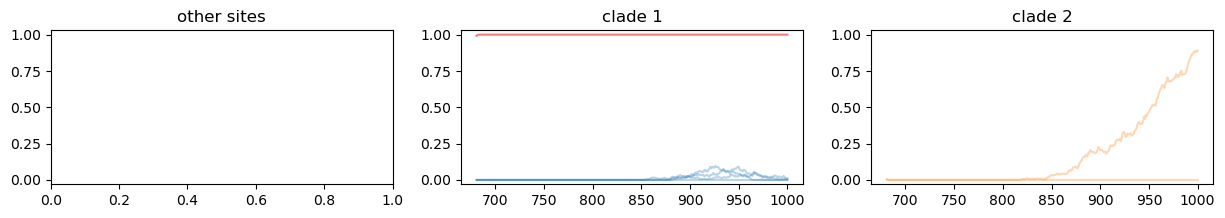

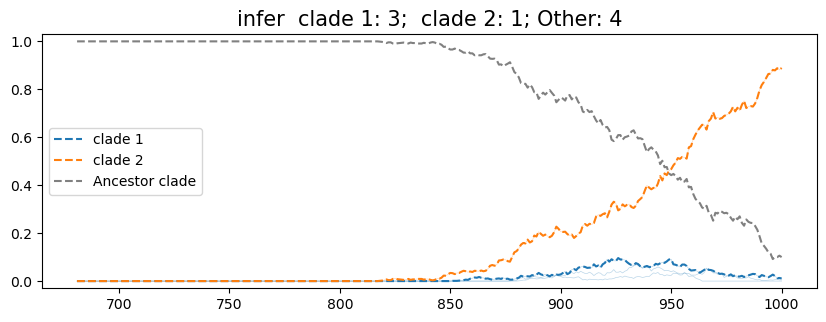

cladeFixedTimes = [680]
period boundaries:  [(0, 681), (680, 1001)]
ancestors:  [0, 2, 4]
refined period boundaries:  [(0, 681), (681, 1001)]


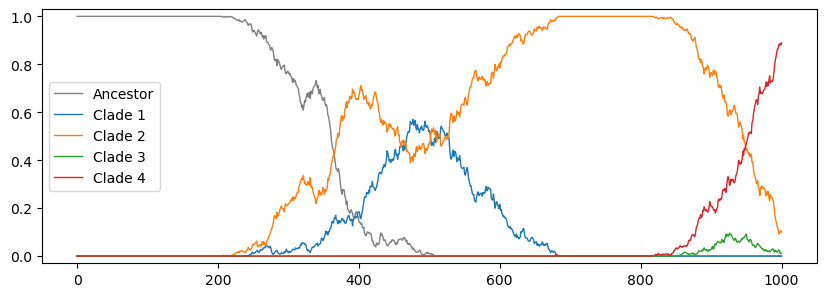

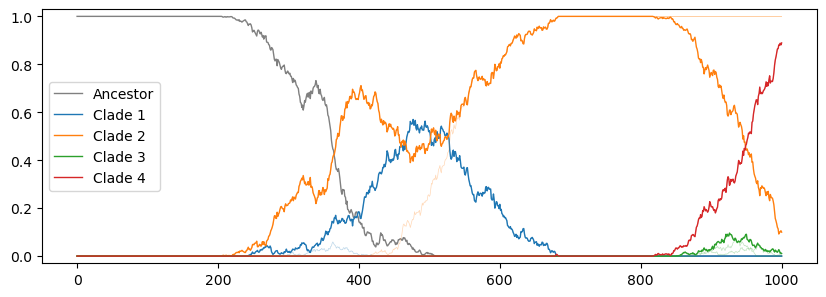

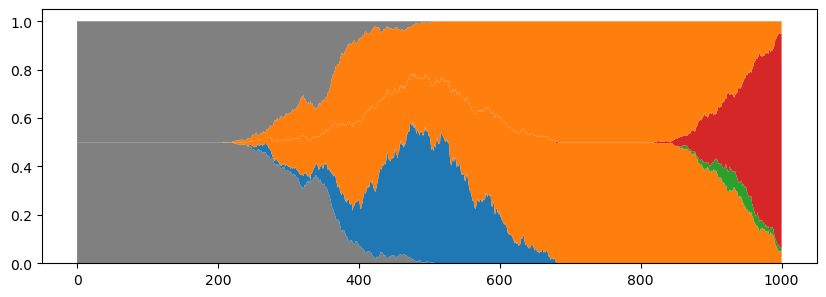

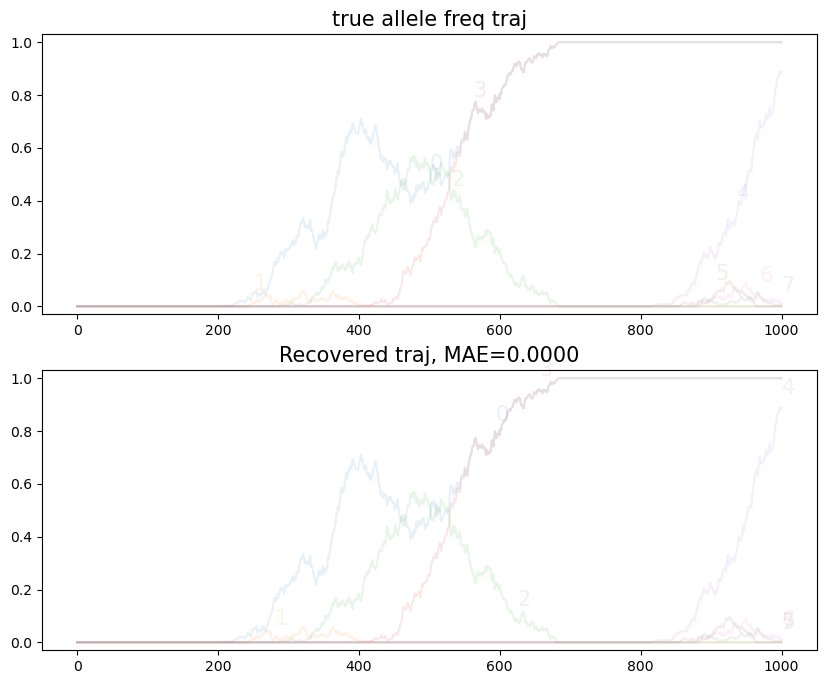

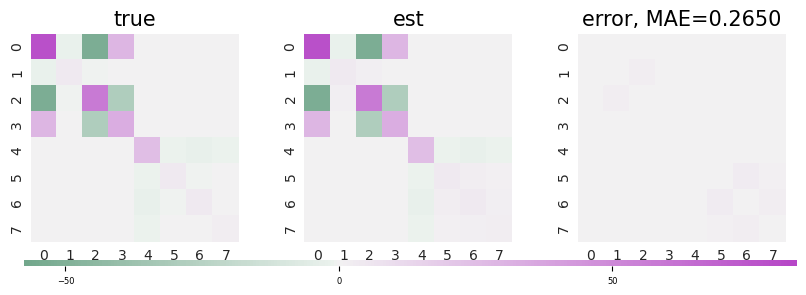

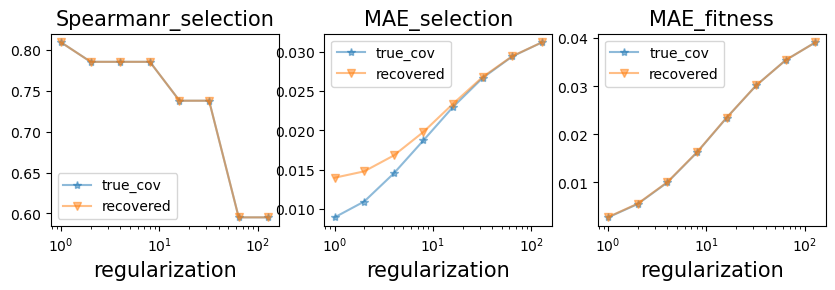

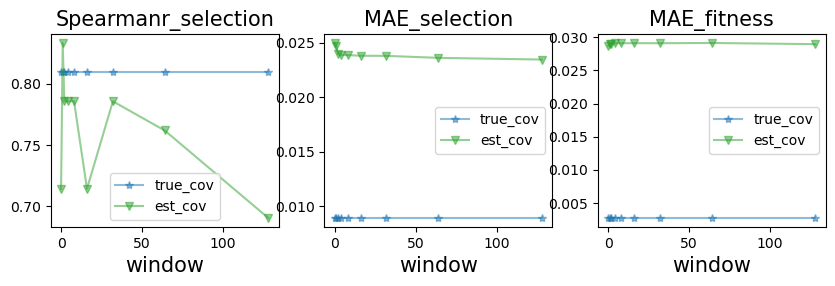

Plotting recovered results using regularization of 1, window of 128


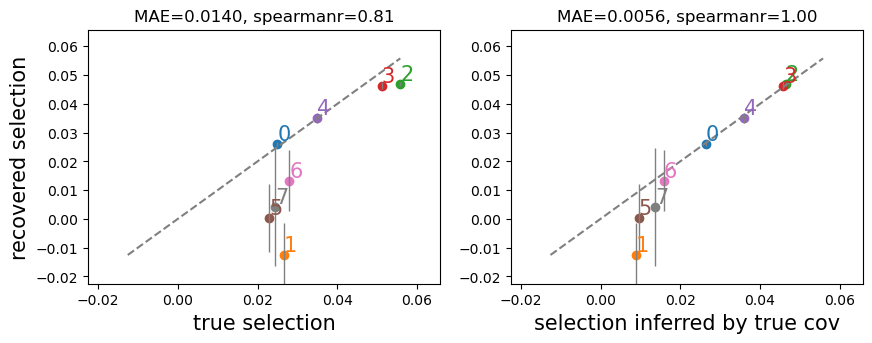

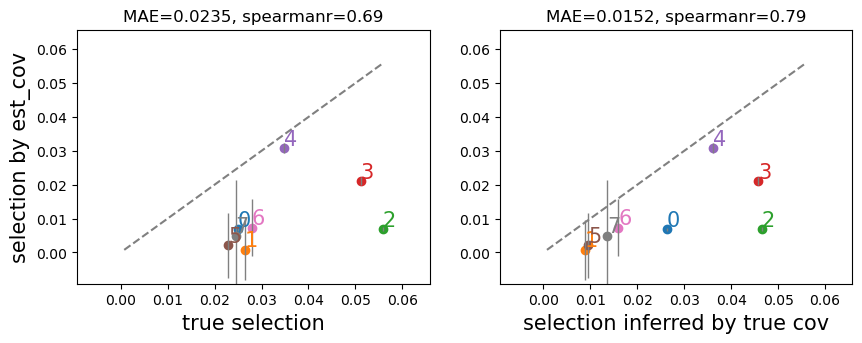

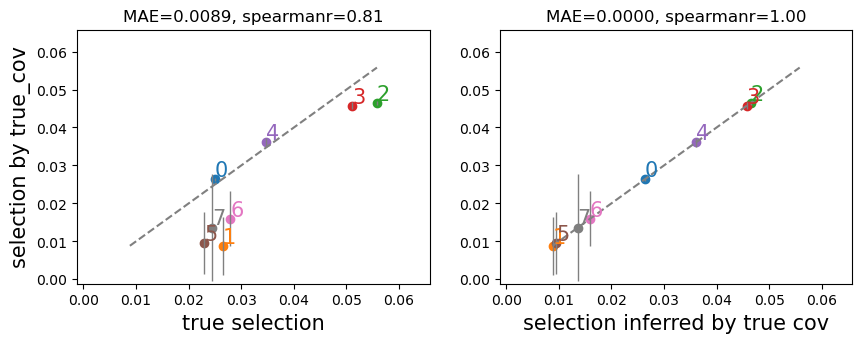

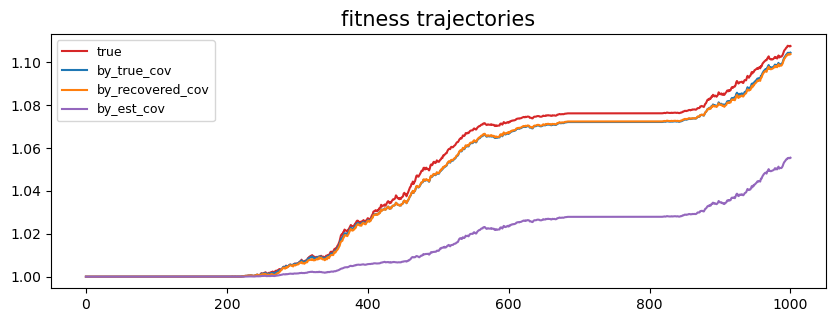

Plotting recovered results using regularization of 1, window of 128


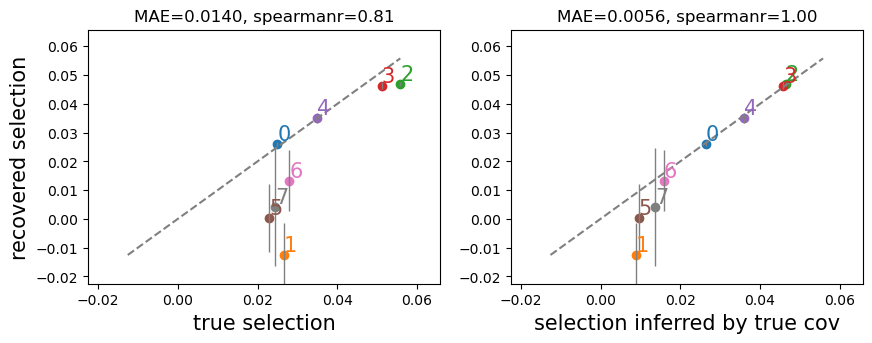

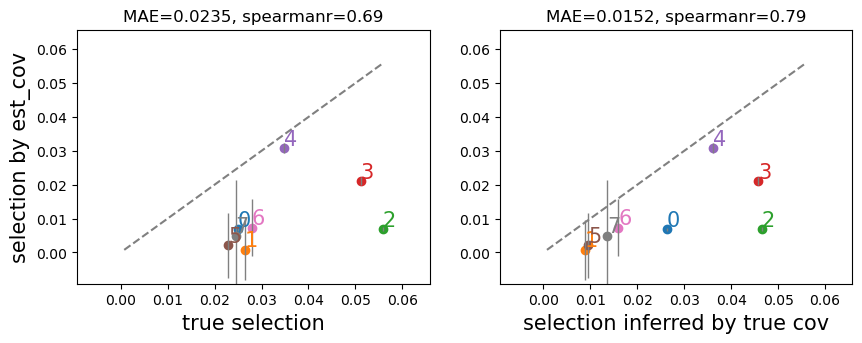

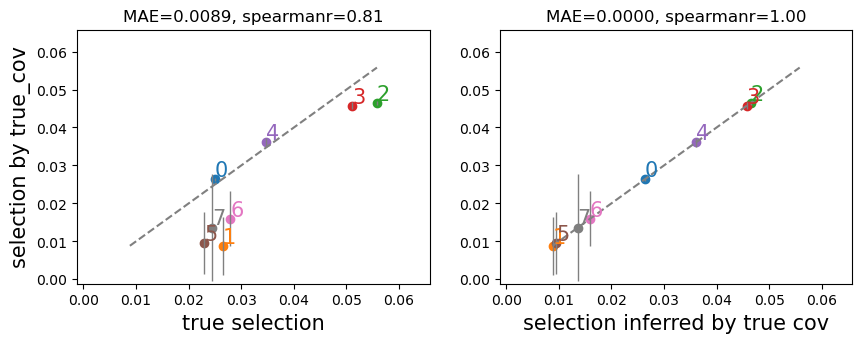

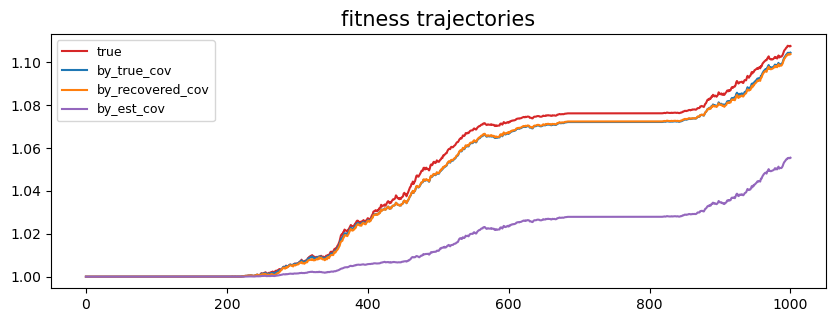

In [13]:
simulation_ = SH.load_simulation(params, 28)
reconstruction_, evaluation_ = SH.get_reconstruction_of_simulation(simulation_, plot=True, verbose=True)

In [229]:
period_durations = [period.times[-1] - period.times[0] for period in reconstruction.periods]
total_duration = reconstruction.times[-1] - reconstruction.times[0]

refined_period_durations = [period.times[-1] - period.times[0] for period in reconstruction.refinedPeriods]

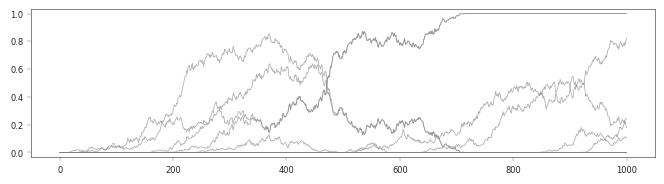

In [230]:
reload()
plotTraj(simulation['traj'], simulation['times'], figsize=(AP.DOUBLE_COLUMN, AP.SINGLE_COLUMN / 2),
    save_file=f'./test_figures/traj_raw.pdf')

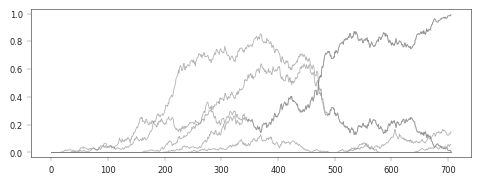

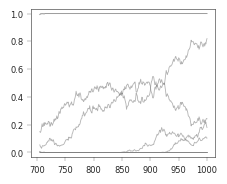

In [231]:
for i, period in enumerate(reconstruction.periods):
    plotTraj(period.traj, period.times, 
        figsize=(AP.DOUBLE_COLUMN * period_durations[i] / total_duration, AP.SINGLE_COLUMN / 2),
        save_file=f'./test_figures/traj_period={i}.pdf')

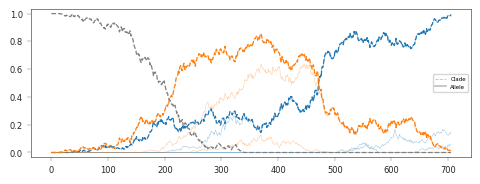

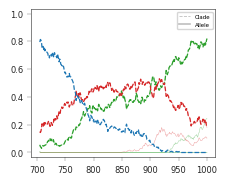

In [235]:
reload()
clade_index_offset = 0
ancestor_clade_index = -1
for i, period in enumerate(reconstruction.periods):
    AP.plotCladeAndMutFreq_overview(period, clade_index_offset=clade_index_offset,
        ancestor_clade_index=ancestor_clade_index,
        figsize=(AP.DOUBLE_COLUMN * period_durations[i] / total_duration, AP.SINGLE_COLUMN / 2),
        marginprops=TRAJ_MARGINPROPS,
        save_file=f'./test_figures/cladeFreq_period={i}.pdf')
    ancestor_clade_index = clade_index_offset + np.argmax(period.cladeFreq[-1])
    clade_index_offset += period.numClades

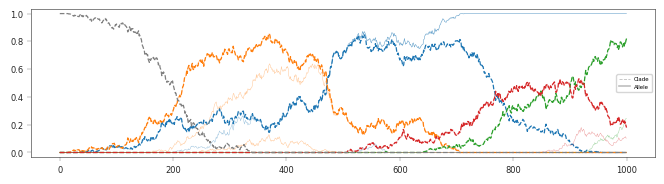

In [236]:
AP.plotCladeAndMutFreq_overview(reconstruction, clade_index_offset=0,
    ancestor_clade_index=-1,
    figsize=(AP.DOUBLE_COLUMN, AP.SINGLE_COLUMN / 2),
    marginprops=TRAJ_MARGINPROPS,
    save_file=f'./test_figures/cladeFreq.pdf')

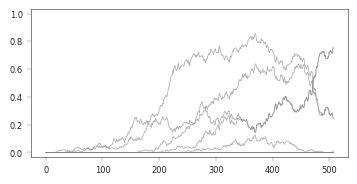

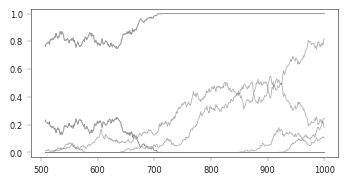

In [241]:
for i, period in enumerate(reconstruction.refinedPeriods):
    plotTraj(period.traj, period.times,
        figsize=(AP.DOUBLE_COLUMN * refined_period_durations[i] / total_duration, AP.SINGLE_COLUMN / 2),
        save_file=f'./test_figures/traj_refinedPeriod={i}.pdf')

In [237]:
reload()
vmin, vmax = None, None
AP.plotIntDxdx(reconstruction.intWeightedDxdx, plot_cbar=False, vmin=vmin, vmax=vmax, plotShow=False,
    plot_xticks=False,
    save_file=f'./test_figures/intDxdx.pdf')
AP.plotSegmentedIntDxdx(reconstruction, plot_cbar=False, vmin=vmin, vmax=vmax, plot_yticks=False, plotShow=False,
    plot_xticks=False,
    save_file=f'./test_figures/segmentedIntDxdx.pdf')

In [238]:
reload()
for i, period in enumerate(reconstruction.periods):
    AP.plotIntDxdx(period.intWeightedDxdx, plot_cbar=False, vmin=vmin, vmax=vmax, plotShow=False,
        plot_xticks=False,
        save_file=f'./test_figures/intDxdx_period={i}.pdf')
    AP.plotSegmentedIntDxdx(period, plot_cbar=False, vmin=vmin, vmax=vmax, plot_yticks=False, plotShow=False,
        plot_xticks=False,
        save_file=f'./test_figures/segmentedIntDxdx_period={i}.pdf')

In [239]:
reload()
for i, period in enumerate(reconstruction.refinedPeriods):
    AP.plotIntDxdx(period.intWeightedDxdx, plot_cbar=False, vmin=vmin, vmax=vmax, plotShow=False,
        plot_xticks=False,
        save_file=f'./test_figures/intDxdx_refinedPeriod={i}.pdf')
    AP.plotSegmentedIntDxdx(period, plot_cbar=False, vmin=vmin, vmax=vmax, plot_yticks=False, plotShow=False,
        plot_xticks=False,
        save_file=f'./test_figures/segmentedIntDxdx_refinedPeriod={i}.pdf')

In [117]:
for i, period in enumerate(reconstruction.periods):
    print(period.numClades)

3
2
1


/Users/yunxiao/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:2780: RuntimeWarning: invalid value encountered in double_scalars
  ddx, ddy = dx / dd2, dy / dd2


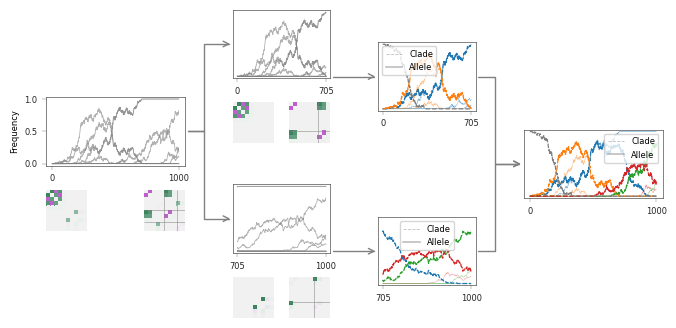

In [328]:
reload()
FIG.plot_figure_method_overview(reconstruction, save_file=None)

/Users/yunxiao/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:2780: RuntimeWarning: invalid value encountered in double_scalars
  ddx, ddy = dx / dd2, dy / dd2


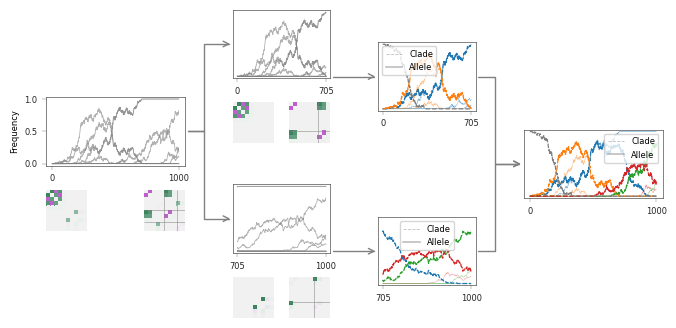

In [342]:
reload()
FIG.plot_figure_method_overview(reconstruction, plot_arrow_from_traj_center=True, 
    save_file=f'./test_figures/fig-overview-aftc.pdf')

/Users/yunxiao/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:2780: RuntimeWarning: invalid value encountered in double_scalars
  ddx, ddy = dx / dd2, dy / dd2


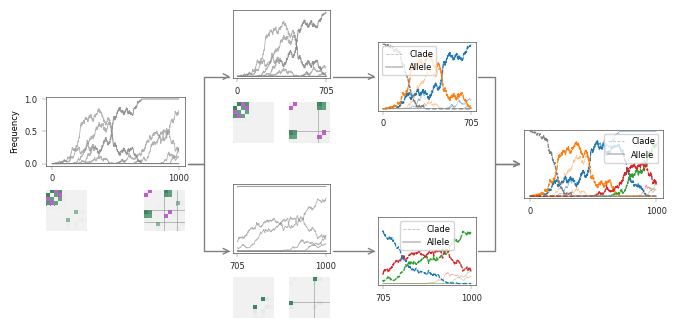

In [341]:
reload()
FIG.plot_figure_method_overview(reconstruction, plot_arrow_from_traj_center=False, 
    save_file=f'./test_figures/fig-overview.pdf')

/Users/yunxiao/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:2780: RuntimeWarning: invalid value encountered in double_scalars
  ddx, ddy = dx / dd2, dy / dd2


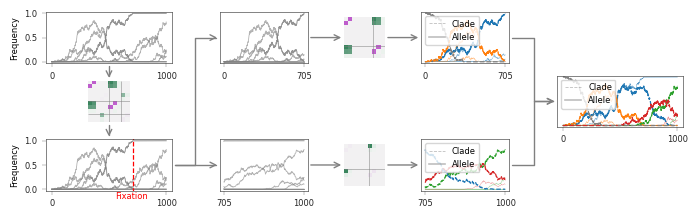

In [400]:
reload()
FIG.plot_figure_method_overview(reconstruction, plot_style=2, plot_arrow_from_traj_center=True,
    save_file=f'./test_figures/fig-overview-style2.pdf')

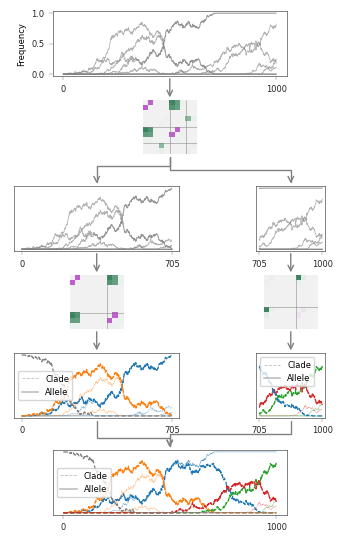

In [565]:
reload()
FIG.plot_figure_method_overview(reconstruction, plot_style=2, plot_single_column=True,
    save_file=f'./test_figures/fig-overview-style2-single.pdf')

In [566]:
print(FIG.SINGLE_COLUMN)

3.3464566929133857


# Save patches and arrange in slides

In [635]:
reload()
FIG.save_subfigure_for_method_overview(reconstruction, save_file_prefix='./test_figures/0-horizontal')

[0.         1.         0.00280076]
[0.        1.        0.1714678]
[0.         1.         0.00280079]
[0.         1.         0.17146842]
[0.         0.38214877 0.00062015]
[0.         0.74932417 0.10908094]


In [621]:
print(reconstruction.periods[0].segmentedIntDxdx[0][-1, -2])

-0.00028093499100000015


In [622]:
print(np.min(reconstruction.periods[0].segmentedIntDxdx[0]))

-0.017584690673000003


### Crop margins

In [15]:
from pdfCropMargins import crop
crop(["-a4", "0", "0", "0", "0", '-o', 
      './test_figures/0-horizontal-v1-cropped.pdf', 
      './test_figures/0-horizontal-v1.pdf'])


(None, None, None)

In [648]:
crop(["-a4", "0", "0", "0", "0", '-o', 
      './test_figures/0-horizontal-v2-cropped.pdf', 
      './test_figures/0-horizontal-v2.pdf'])

(None, None, None)

In [16]:
crop(["-a4", "0", "0", "0", "0", '-o', 
      './test_figures/1-merge-periods-v1-cropped.pdf', 
      './test_figures/1-merge-periods-v1.pdf'])

(None, None, None)

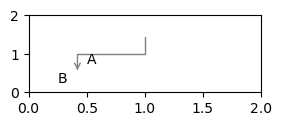

In [513]:
plt.figure(figsize=(3, 1))
ax = plt.gca()
def_arrowprops = {
    'arrowstyle': '<-',
    'color': '0.5',
    'shrinkA': 2, 
    'shrinkB': 2,
    'patchA': None, 
    'patchB': None,
}
annotprops = {
    'xy': None,
    'xytext': None,
    'xycoords': 'axes fraction',
    'textcoords': 'axes fraction',
}
connectionstyle = 'bar,angle=0,fraction=-0.25'
annotprops['xy'] = 0.5, 0.75
annotprops['xytext'] = 0.21, 0.25
arrowprops = {**def_arrowprops, 'connectionstyle': connectionstyle}
ax.annotate('', **annotprops, arrowprops=arrowprops,)
plt.text(0.5, 0.75, 'A')
plt.text(0.25, 0.25, 'B')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.show()

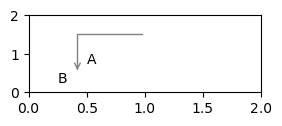

In [512]:
plt.figure(figsize=(3, 1))
ax = plt.gca()
def_arrowprops = {
    'arrowstyle': '<-',
    'color': '0.5',
    'shrinkA': 2, 
    'shrinkB': 2,
    'patchA': None, 
    'patchB': None,
}
annotprops = {
    'xy': None,
    'xytext': None,
    'xycoords': 'axes fraction',
    'textcoords': 'axes fraction',
}
connectionstyle = 'bar,angle=0,fraction=-0.5'
annotprops['xy'] = 0.5, 0.75
annotprops['xytext'] = 0.21, 0.25
arrowprops = {**def_arrowprops, 'connectionstyle': connectionstyle}
ax.annotate('', **annotprops, arrowprops=arrowprops,)
plt.text(0.5, 0.75, 'A')
plt.text(0.25, 0.25, 'B')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.show()

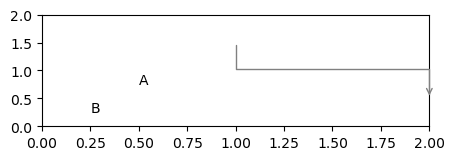

In [553]:
plt.figure(figsize=(1*5, 0.29*5))
ax = plt.gca()
def_arrowprops = {
    'arrowstyle': '<-',
    'color': '0.5',
    'shrinkA': 2, 
    'shrinkB': 2,
    'patchA': None, 
    'patchB': None,
}
annotprops = {
    'xy': None,
    'xytext': None,
    'xycoords': 'axes fraction',
    'textcoords': 'axes fraction',
}
connectionstyle = 'bar,angle=180,fraction=-0.13'
annotprops['xy'] = 0.5, 0.75
annotprops['xytext'] = 1, 0.25
arrowprops = {**def_arrowprops, 'connectionstyle': connectionstyle}
ax.annotate('', **annotprops, arrowprops=arrowprops,)
plt.text(0.5, 0.75, 'A')
plt.text(0.25, 0.25, 'B')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.show()